In [263]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

### Bringing in data from csv files

In [264]:
members = pd.read_csv('data/NSS_GreatCare_Members.csv')
adm = pd.read_csv('data/NSS_Hospital_inpatient_admissions.csv')
pcp = pd.read_csv('data/NSS_PrimaryCare_Office_Visits.csv') #dtype=str)

C:\Users\dhoza\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,5,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


#### Choosing only the columns needed

In [265]:
pcp2=pcp[['Patient ID','Provider Group NPI','Service Provider NPI','Encounter Date','Encounter ID']]

In [266]:
pcp2.sort_values('Patient ID')

,Patient ID,Provider Group NPI,Service Provider NPI,Encounter Date,Encounter ID
75932,DS1|1,1.083695e+09,1.295710e+09,2013-04-11,COV|PCSL|DS1|1|P|10130|1083694616|1
75933,DS1|1,1.083695e+09,1.922083e+09,2013-11-04,COV|PCSL|DS1|1|P|371880|1083694616|1
75934,DS1|1,1.083695e+09,1.548246e+09,2013-11-21,COV|PCSL|DS1|1|P|659989|1083694616|1
43790,DS1|10,1.083695e+09,1.245670e+09,2013-04-17,COV|PBSL|DS1|10|P|765689|1083694616|1
43784,DS1|10,1.639169e+09,1.457336e+09,2012-08-17,COV|PBSL|DS1|10|P|1070821|1639168594|1
...,...,...,...,...,...
231364,DS1|9999,1.043427e+09,1.235367e+09,2011-04-22,COV|PCSL|DS1|9999|P|192754|1043427248|1
231365,DS1|9999,1.184723e+09,1.851738e+09,2014-10-07,COV|PCSL|DS1|9999|P|494636|1184722779|1
231366,DS1|9999,1.043427e+09,1.407009e+09,2012-11-04,COV|PCSL|DS1|9999|P|642185|1043427248|1
231367,DS1|9999,1.184723e+09,1.851738e+09,2014-12-09,COV|PCSL|DS1|9999|P|818335|1184722779|1


In [267]:
#convert floats to int
#pcp2['Provider Group NPI'] = pcp2['Provider Group NPI'].astype(int)
#pcp.info()

## 1. What is our 30-day all cause readmission rate across hospitals our members are admitted to?

In [268]:
thirtyadm = adm[['Patient ID','Facility Provider ID','Encounter Start Date','Encounter End Date']]

In [269]:
##renaming columns to be one "word"
thirtyadm.columns = ['patient_id','facility_id','start_date','end_date']

### Getting the next admission date for same patient to same line

In [270]:
thirtyadm['next_adm']=thirtyadm.sort_values(by=['start_date'],ascending=True).groupby(['patient_id'])['start_date'].shift(-1)

<ipython-input-270-20eec885cd01>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thirtyadm['next_adm']=thirtyadm.sort_values(by=['start_date'],ascending=True).groupby(['patient_id'])['start_date'].shift(-1)


In [271]:
#testing output
#thirtyadm[thirtyadm['patient_id']=='DS1|9994']

### Setting dates to datetime

In [272]:
thirtyadm['start_date'] = pd.to_datetime(thirtyadm['start_date'], format='%Y-%m-%d')
thirtyadm['end_date'] = pd.to_datetime(thirtyadm['end_date'], format='%Y-%m-%d')
thirtyadm['next_adm'] =  pd.to_datetime(thirtyadm['next_adm'], format='%Y-%m-%d')
adm['Encounter Start Date']=pd.to_datetime(adm['Encounter Start Date'])

<ipython-input-272-02767bdea064>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thirtyadm['start_date'] = pd.to_datetime(thirtyadm['start_date'], format='%Y-%m-%d')
<ipython-input-272-02767bdea064>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thirtyadm['end_date'] = pd.to_datetime(thirtyadm['end_date'], format='%Y-%m-%d')
<ipython-input-272-02767bdea064>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [273]:
### Teng's way to do all date conversions in one line of code
#inpatient_admin[['Encounter Start Date','Encounter End Date']] = inpatient_admin[['Encounter Start Date','Encounter End Date']].apply(pd.to_datetime)
## if only one needs to be converted
#pcp_visit['Encounter Date'] = pd.to_datetime(pcp_visit['Encounter Date'])

### Making a new column to calculate the difference of end to readmission

In [274]:
thirtyadm['diff']=thirtyadm['next_adm'] - thirtyadm['end_date']
thirtyadm

<ipython-input-274-dfee87bacf4c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thirtyadm['diff']=thirtyadm['next_adm'] - thirtyadm['end_date']


,patient_id,facility_id,start_date,end_date,next_adm,diff
0,DS1|10033,DS1|NPI|1306890389,2013-01-12,2013-01-14,NaT,NaT
1,DS1|10043,DS1|NPI|1902803315,2014-01-05,2014-01-12,NaT,NaT
2,DS1|10073,DS1|NPI|1902803315,2012-06-13,2012-06-21,NaT,NaT
3,DS1|10101,DS1|NPI|1427055839,2012-12-06,2012-12-09,NaT,NaT
4,DS1|10118,DS1|NPI|1992818256,2015-03-11,2015-03-14,NaT,NaT
...,...,...,...,...,...,...
6208,DS1|9979,DS1|NPI|1689772592,2015-02-06,2015-02-11,NaT,NaT
6209,DS1|9981,DS1|NPI|1427055839,2014-08-07,2014-08-10,NaT,NaT
6210,DS1|9994,DS1|NPI|1689608150,2015-11-21,2015-11-23,2015-11-24,1 days
6211,DS1|9994,DS1|NPI|1689608150,2015-11-24,2015-11-27,NaT,NaT


### Rows with NaT are patients that were not readmitted, dropping them

In [275]:
pt_readmitted=thirtyadm.dropna()
pt_readmitted

,patient_id,facility_id,start_date,end_date,next_adm,diff
8,DS1|10132,DS1|NPI|1386741635,2013-03-30,2013-04-01,2013-08-14,135 days
18,DS1|10253,DS1|NPI|1396725677,2010-06-02,2010-06-06,2011-10-15,496 days
19,DS1|10253,DS1|NPI|1689772592,2010-04-02,2010-04-16,2010-06-02,47 days
20,DS1|10291,DS1|NPI|1821250762,2010-05-14,2010-05-15,2011-02-24,285 days
34,DS1|10451,DS1|NPI|1023010113,2014-04-24,2014-04-26,2014-05-23,27 days
...,...,...,...,...,...,...
6198,DS1|9935,DS1|NPI|1669456299,2011-01-22,2011-01-24,2011-01-25,1 days
6199,DS1|9935,DS1|NPI|1902803315,2011-01-25,2011-01-26,2011-01-26,0 days
6201,DS1|9943,DS1|NPI|1184722779,2013-10-01,2013-10-16,2013-10-25,9 days
6202,DS1|9943,DS1|NPI|1184722779,2013-10-25,2013-10-28,2014-10-28,365 days


In [276]:
#testing output
#pt_readmitted[pt_readmitted['patient_id']=='DS1|6964']

###  Sorting start date 

In [277]:
pt_readmitted=pt_readmitted.sort_values('start_date')
pt_readmitted

,patient_id,facility_id,start_date,end_date,next_adm,diff
77,DS1|10734,DS1|NPI|1104982917,2009-11-11,2009-11-25,2010-04-25,151 days
3367,DS1|39675,DS1|NPI|1184722779,2009-11-24,2010-11-30,2011-01-17,48 days
1304,DS1|21571,DS1|NPI|1689608150,2009-11-27,2009-12-02,2010-02-20,80 days
2612,DS1|3294,DS1|NPI|1710065933,2009-11-28,2009-12-08,2010-01-01,24 days
4982,DS1|53976,DS1|NPI|1689772592,2009-11-29,2009-12-01,2009-12-28,27 days
...,...,...,...,...,...,...
4642,DS1|51247,DS1|NPI|1184722779,2018-07-16,2018-07-21,2019-04-09,262 days
5899,DS1|6964,DS1|NPI|1184722779,2018-07-21,2018-11-18,2018-07-21,-120 days
5898,DS1|6964,DS1|NPI|0000000000,2018-07-21,2018-09-18,2018-11-23,66 days
922,DS1|18117,DS1|NPI|1033298617,2018-08-08,2018-08-11,2018-08-08,-3 days


### Dropping negative dates (bad input??)

In [278]:
pt_readmitted=pt_readmitted[pt_readmitted['diff']>='0 days']                            

In [279]:
pt_readmitted

,patient_id,facility_id,start_date,end_date,next_adm,diff
77,DS1|10734,DS1|NPI|1104982917,2009-11-11,2009-11-25,2010-04-25,151 days
3367,DS1|39675,DS1|NPI|1184722779,2009-11-24,2010-11-30,2011-01-17,48 days
1304,DS1|21571,DS1|NPI|1689608150,2009-11-27,2009-12-02,2010-02-20,80 days
2612,DS1|3294,DS1|NPI|1710065933,2009-11-28,2009-12-08,2010-01-01,24 days
4982,DS1|53976,DS1|NPI|1689772592,2009-11-29,2009-12-01,2009-12-28,27 days
...,...,...,...,...,...,...
3910,DS1|44744,DS1|NPI|1710918545,2018-05-01,2018-05-04,2018-06-12,39 days
282,DS1|12364,DS1|NPI|1528041811,2018-05-02,2018-05-12,2018-05-12,0 days
4642,DS1|51247,DS1|NPI|1184722779,2018-07-16,2018-07-21,2019-04-09,262 days
5898,DS1|6964,DS1|NPI|0000000000,2018-07-21,2018-09-18,2018-11-23,66 days


### Finding patients readmitted before 30 days

In [280]:
pt_readm_thirty=pt_readmitted[pt_readmitted['diff']<= '30 days']
pt_readm_thirty

,patient_id,facility_id,start_date,end_date,next_adm,diff
2612,DS1|3294,DS1|NPI|1710065933,2009-11-28,2009-12-08,2010-01-01,24 days
4982,DS1|53976,DS1|NPI|1689772592,2009-11-29,2009-12-01,2009-12-28,27 days
3804,DS1|43565,DS1|NPI|1801152566,2009-12-09,2009-12-17,2009-12-30,13 days
3166,DS1|37954,DS1|NPI|1689772592,2009-12-16,2009-12-23,2009-12-23,0 days
3169,DS1|37954,DS1|NPI|1871543215,2009-12-23,2010-01-29,2010-02-16,18 days
...,...,...,...,...,...,...
1864,DS1|25963,DS1|NPI|1992818256,2017-09-10,2017-09-14,2017-09-15,1 days
3608,DS1|41795,DS1|NPI|1902803315,2017-12-25,2018-01-07,2018-01-31,24 days
279,DS1|12364,DS1|NPI|1184722779,2018-03-13,2018-03-18,2018-04-04,17 days
280,DS1|12364,DS1|NPI|1184722779,2018-04-04,2018-04-11,2018-05-02,21 days


In [281]:
pt_readm_thirty.count()

patient_id     696
facility_id    696
start_date     696
end_date       696
next_adm       696
diff           696
dtype: int64

### Grouping dates/data in 30 day bins

In [282]:
###testing
#thirtyadm.groupby(pd.Grouper(key='start_date',freq='BM')).count().dropna()

In [283]:
adm1=adm.sort_values('Encounter Start Date',ascending=True)
adm1

,Encounter ID,Patient ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Facility Provider ID,Attending Provider ID,Attending Provider NPI,Facility Provider NPI,Encounter Start Date,Encounter End Date,...,CMS Admit Source Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Principal Discharge Diagnosis ICD-9-CM Code,Principal Discharge Diagnosis ICD-9-CM Description,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Primary Plan Allowed Amount,Primary Plan Paid Amount,Patient Paid Amount
156,HIA|DS1|11335|DS1|NPI|1184722779|1,DS1|11335,DS1|1,DS1|5047W,DS1|NPI|1184722779,DS1|NPI|1457572448,1.457572e+09,1184722779,1996-10-06,2014-07-10,...,1,1,11.0,NaN,NaN,I21.4,Non-ST elevation (NSTEMI) myocardial infarction,0,58491.54,714.71
77,HIA|DS1|10734|DS1|NPI|1104982917|1,DS1|10734,DS1|1,DS1|5047W,DS1|NPI|1104982917,DS1|NPI|1629382395,1.629382e+09,1104982917,2009-11-11,2009-11-25,...,1,1,21.0,427.31,Atrial fibrillation,NaN,NaN,0,58730.78,0.00
1899,HIA|DS1|26295|DS1|NPI|1689608150|1,DS1|26295,DS1|1,DS1|5047W,DS1|NPI|1689608150,DS1|NPI|1346313590,1.346314e+09,1689608150,2009-11-12,2009-11-30,...,1,1,NaN,779.89,Other specified conditions originating in the ...,NaN,NaN,0,32156.07,0.00
3367,HIA|DS1|39675|DS1|NPI|1184722779|1,DS1|39675,DS1|1,DS1|5047Z,DS1|NPI|1184722779,DS1|NPI|1124227483,1.124227e+09,1184722779,2009-11-24,2010-11-30,...,1,1,21.0,NaN,NaN,C92.02,"Acute myeloblastic leukemia, in relapse",0,421227.75,260.00
1304,HIA|DS1|21571|DS1|NPI|1689608150|1,DS1|21571,DS1|1,DS1|5047W,DS1|NPI|1689608150,DS1|NPI|1376637637,1.376638e+09,1689608150,2009-11-27,2009-12-02,...,4,1,21.0,493.22,Chronic obstructive asthma with (acute) exacer...,NaN,NaN,0,23949.27,250.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,HIA|DS1|7017|DS1|NPI|1184722779|1,DS1|7017,DS1|1,DS1|5047X,DS1|NPI|1184722779,DS1|NPI|1730127069,1.730127e+09,1184722779,2019-02-14,2019-02-18,...,1,1,21.0,NaN,NaN,O43.123,"Velamentous insertion of umbilical cord, third...",0,20933.00,250.00
2428,HIA|DS1|31201|DS1|NPI|1184722779|1,DS1|31201,DS1|1,DS1|5047W,DS1|NPI|1184722779,DS1|NPI|1053334292,1.053334e+09,1184722779,2019-02-15,2019-02-18,...,NaN,1,21.0,NaN,NaN,Z38.01,"Single liveborn infant, delivered by cesarean",0,2596.78,250.00
1335,HIA|DS1|2184|DS1|NPI|1902803315|2,DS1|2184,DS1|1,DS1|5047X,DS1|NPI|1902803315,DS1|NPI|1437358884,1.437359e+09,1902803315,2019-02-24,2019-02-26,...,1,6,21.0,NaN,NaN,Z43.2,Encounter for attention to ileostomy,0,18750.00,250.00
4643,HIA|DS1|51247|DS1|NPI|1184722779|2,DS1|51247,DS1|1,DS1|5047W,DS1|NPI|1184722779,DS1|NPI|1851529879,1.851530e+09,1184722779,2019-04-09,2019-04-13,...,1,1,21.0,NaN,NaN,T82.855A,"Stenosis of coronary artery stent, initial enc...",0,45083.79,202.00


In [284]:
## trying to include the total admissions in a column so I can plot it on a bar chart
#adm.groupby(pd.Grouper(key='Encounter Start Date',freq='BM')).count().dropna()
#pt_readm_thirty['Total Admissions'] = adm['Patient ID'].count()
## official readmission dates in 30 day bins, BM is Business Month which is 30 day intervals
#adm1.groupby(pd.Grouper(key='Encounter Start Date',freq='BM')).count().dropna()

In [285]:
##do not use
#adm1=adm1[['Encounter Start Date','Patient ID']]
#adm1

In [286]:
## official readmission dates in 30 day bins, BM is Business Month which is 30 day intervals
pt_readm_thirty.groupby(pd.Grouper(key='start_date',freq='BM')).count().dropna()

,patient_id,facility_id,end_date,next_adm,diff
start_date,,,,,
2009-11-30,2,2,2,2,2
2009-12-31,5,5,5,5,5
2010-01-29,1,1,1,1,1
2010-02-26,1,1,1,1,1
2010-03-31,2,2,2,2,2
...,...,...,...,...,...
2018-01-31,0,0,0,0,0
2018-02-28,0,0,0,0,0
2018-03-30,1,1,1,1,1


In [287]:
###do not use
#df=pd.merge(adm1,pt_readm_thirty,how='right',left_on=['Encounter Start Date'],right_on=['start_date'])
#df

### Denominator is total admissions (all patients)

In [288]:
totaladm = adm[adm.columns[0]].count()
totaladm

6213

### Readmission rate

In [289]:
##rate is 0.092548 or 11.2%
readmin_rate=(pt_readm_thirty.count())/(adm[adm.columns[0]].count())
readmin_rate

patient_id     0.112023
facility_id    0.112023
start_date     0.112023
end_date       0.112023
next_adm       0.112023
diff           0.112023
dtype: float64

## Question 2. What percent of patients have a PCP visit within a week of discharge?

In [290]:
##merging admissions with pcp to get discharge date
pcp_adm=pd.merge(thirtyadm,pcp2,how='inner',left_on=['patient_id'],right_on=['Patient ID'])
pcp_adm

,patient_id,facility_id,start_date,end_date,next_adm,diff,Patient ID,Provider Group NPI,Service Provider NPI,Encounter Date,Encounter ID
0,DS1|10033,DS1|NPI|1306890389,2013-01-12,2013-01-14,NaT,NaT,DS1|10033,1.043427e+09,1.619980e+09,2015-12-08,COV|PBSL|DS1|10033|P|1228384|1043427248|1|SHIFTED
1,DS1|10033,DS1|NPI|1306890389,2013-01-12,2013-01-14,NaT,NaT,DS1|10033,1.043427e+09,1.225216e+09,2012-06-18,COV|PBSL|DS1|10033|P|1326684|1043427248|1|SHIFTED
2,DS1|10033,DS1|NPI|1306890389,2013-01-12,2013-01-14,NaT,NaT,DS1|10033,1.043427e+09,1.619980e+09,2014-06-10,COV|PBSL|DS1|10033|P|155317|1043427248|1|SHIFTED
3,DS1|10033,DS1|NPI|1306890389,2013-01-12,2013-01-14,NaT,NaT,DS1|10033,1.043427e+09,1.366453e+09,2014-09-28,COV|PBSL|DS1|10033|P|439093|1043427248|1|SHIFTED
4,DS1|10033,DS1|NPI|1306890389,2013-01-12,2013-01-14,NaT,NaT,DS1|10033,1.043427e+09,1.619980e+09,2014-03-16,COV|PBSL|DS1|10033|P|711310|1043427248|1|SHIFTED
...,...,...,...,...,...,...,...,...,...,...,...
43786,DS1|9994,DS1|NPI|1689608150,2015-11-24,2015-11-27,NaT,NaT,DS1|9994,1.407059e+09,1.043269e+09,2015-06-22,COV|ICSL|DS1|9994|I|682672|1689608150|6
43787,DS1|9994,DS1|NPI|1689608150,2015-11-24,2015-11-27,NaT,NaT,DS1|9994,1.407059e+09,1.487735e+09,2015-12-05,COV|PCSL|DS1|9994|P|1238517|1407058787|2
43788,DS1|9994,DS1|NPI|1689608150,2015-11-24,2015-11-27,NaT,NaT,DS1|9994,1.407059e+09,1.487735e+09,2015-12-13,COV|PCSL|DS1|9994|P|302749|1407058787|2
43789,DS1|9994,DS1|NPI|1689608150,2015-11-24,2015-11-27,NaT,NaT,DS1|9994,1.205884e+09,1.669553e+09,2014-05-18,COV|PCSL|DS1|9994|P|781849|1205884392|1


In [291]:
thirtyadm

,patient_id,facility_id,start_date,end_date,next_adm,diff
0,DS1|10033,DS1|NPI|1306890389,2013-01-12,2013-01-14,NaT,NaT
1,DS1|10043,DS1|NPI|1902803315,2014-01-05,2014-01-12,NaT,NaT
2,DS1|10073,DS1|NPI|1902803315,2012-06-13,2012-06-21,NaT,NaT
3,DS1|10101,DS1|NPI|1427055839,2012-12-06,2012-12-09,NaT,NaT
4,DS1|10118,DS1|NPI|1992818256,2015-03-11,2015-03-14,NaT,NaT
...,...,...,...,...,...,...
6208,DS1|9979,DS1|NPI|1689772592,2015-02-06,2015-02-11,NaT,NaT
6209,DS1|9981,DS1|NPI|1427055839,2014-08-07,2014-08-10,NaT,NaT
6210,DS1|9994,DS1|NPI|1689608150,2015-11-21,2015-11-23,2015-11-24,1 days
6211,DS1|9994,DS1|NPI|1689608150,2015-11-24,2015-11-27,NaT,NaT


In [292]:
pcp_adm['Encounter Date']=pd.to_datetime(pcp_adm['Encounter Date'])

In [293]:
pcp_adm=pcp_adm[['Patient ID','end_date','Provider Group NPI','Service Provider NPI','Encounter Date']]

In [294]:
pcp_adm['Days to PCP Visit']=pcp_adm['Encounter Date'] - pcp_adm['end_date']

<ipython-input-294-bbde2e7eaf73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pcp_adm['Days to PCP Visit']=pcp_adm['Encounter Date'] - pcp_adm['end_date']


In [295]:
pcp_adm=pcp_adm[pcp_adm['Days to PCP Visit']>='0 days'] 
pcp_adm

,Patient ID,end_date,Provider Group NPI,Service Provider NPI,Encounter Date,Days to PCP Visit
0,DS1|10033,2013-01-14,1.043427e+09,1.619980e+09,2015-12-08,1058 days
2,DS1|10033,2013-01-14,1.043427e+09,1.619980e+09,2014-06-10,512 days
3,DS1|10033,2013-01-14,1.043427e+09,1.366453e+09,2014-09-28,622 days
4,DS1|10033,2013-01-14,1.043427e+09,1.619980e+09,2014-03-16,426 days
5,DS1|10033,2013-01-14,1.043427e+09,1.619980e+09,2014-12-09,694 days
...,...,...,...,...,...,...
43774,DS1|9981,2014-08-10,1.043427e+09,1.992932e+09,2014-08-21,11 days
43779,DS1|9994,2015-11-23,1.407059e+09,1.487735e+09,2015-12-05,12 days
43780,DS1|9994,2015-11-23,1.407059e+09,1.487735e+09,2015-12-13,20 days
43787,DS1|9994,2015-11-27,1.407059e+09,1.487735e+09,2015-12-05,8 days


### Finding patients who visited PCP within 7 days of discharge

In [296]:
pcp_seven=pcp_adm[pcp_adm['Days to PCP Visit']<= '7 days']

In [297]:
pcp_seven

,Patient ID,end_date,Provider Group NPI,Service Provider NPI,Encounter Date,Days to PCP Visit
17,DS1|10043,2014-01-12,1.043427e+09,1.619200e+09,2014-01-12,0 days
28,DS1|10073,2012-06-21,1.043427e+09,1.659394e+09,2012-06-27,6 days
50,DS1|10101,2012-12-09,1.043427e+09,1.952538e+09,2012-12-12,3 days
229,DS1|10303,2012-06-24,1.912988e+09,1.447235e+09,2012-06-30,6 days
236,DS1|10303,2012-06-24,1.912988e+09,1.164408e+09,2012-06-28,4 days
...,...,...,...,...,...,...
43746,DS1|9945,2013-02-11,1.043427e+09,1.164698e+09,2013-02-14,3 days
43761,DS1|9978,2015-09-05,1.043427e+09,1.144275e+09,2015-09-11,6 days
43765,DS1|9979,2015-02-11,1.477666e+09,1.740278e+09,2015-02-15,4 days
43768,DS1|9981,2014-08-10,1.043427e+09,1.992932e+09,2014-08-11,1 days


In [298]:
## Teng's loop 
##for i in inpatient_pcp_df['7_Days']:
#    if (i <= dt.timedelta(days=7)) and (i > dt.timedelta(days=0)) :
#        t.append('yes')
#    else:
#        t.append('no')

In [299]:
#pcp_seven=pcp_seven[pcp_seven['Days to PCP Visit']>'0 days'] 

In [300]:
pcp_seven_unique=pcp_seven.drop_duplicates(subset=['Patient ID','end_date'],keep='first')

In [301]:
pcp_seven_unique

,Patient ID,end_date,Provider Group NPI,Service Provider NPI,Encounter Date,Days to PCP Visit
17,DS1|10043,2014-01-12,1.043427e+09,1.619200e+09,2014-01-12,0 days
28,DS1|10073,2012-06-21,1.043427e+09,1.659394e+09,2012-06-27,6 days
50,DS1|10101,2012-12-09,1.043427e+09,1.952538e+09,2012-12-12,3 days
229,DS1|10303,2012-06-24,1.912988e+09,1.447235e+09,2012-06-30,6 days
245,DS1|10305,2014-05-12,1.184723e+09,1.417113e+09,2014-05-13,1 days
...,...,...,...,...,...,...
43734,DS1|9943,2014-10-30,1.184723e+09,1.659330e+09,2014-11-03,4 days
43746,DS1|9945,2013-02-11,1.043427e+09,1.164698e+09,2013-02-14,3 days
43761,DS1|9978,2015-09-05,1.043427e+09,1.144275e+09,2015-09-11,6 days
43765,DS1|9979,2015-02-11,1.477666e+09,1.740278e+09,2015-02-15,4 days


In [302]:
pcp_rate=((pcp_seven_unique['Patient ID'].count())/(adm[adm.columns[0]].count())*100)

### Percent of patients who saw their PCP within 7 days of discharge

In [303]:
pcp_rate

29.98551424432641

## Q3. Do either vary by individual or group PCP's?

In [304]:
pcp_seven

,Patient ID,end_date,Provider Group NPI,Service Provider NPI,Encounter Date,Days to PCP Visit
17,DS1|10043,2014-01-12,1.043427e+09,1.619200e+09,2014-01-12,0 days
28,DS1|10073,2012-06-21,1.043427e+09,1.659394e+09,2012-06-27,6 days
50,DS1|10101,2012-12-09,1.043427e+09,1.952538e+09,2012-12-12,3 days
229,DS1|10303,2012-06-24,1.912988e+09,1.447235e+09,2012-06-30,6 days
236,DS1|10303,2012-06-24,1.912988e+09,1.164408e+09,2012-06-28,4 days
...,...,...,...,...,...,...
43746,DS1|9945,2013-02-11,1.043427e+09,1.164698e+09,2013-02-14,3 days
43761,DS1|9978,2015-09-05,1.043427e+09,1.144275e+09,2015-09-11,6 days
43765,DS1|9979,2015-02-11,1.477666e+09,1.740278e+09,2015-02-15,4 days
43768,DS1|9981,2014-08-10,1.043427e+09,1.992932e+09,2014-08-11,1 days


In [305]:
##getting rid of decimal
pcp_seven['Provider Group NPI'] = pcp_seven['Provider Group NPI'].map(lambda x: str(x)[:-2])

<ipython-input-305-4dd9311481db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pcp_seven['Provider Group NPI'] = pcp_seven['Provider Group NPI'].map(lambda x: str(x)[:-2])


In [306]:
##dropping na and retyping as str
pcp_seven['Provider Group NPI'] =pcp_seven['Provider Group NPI'].dropna().astype(str)

<ipython-input-306-ed8cc7a1a0b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pcp_seven['Provider Group NPI'] =pcp_seven['Provider Group NPI'].dropna().astype(str)


In [307]:
pcp_seven=pcp_seven.groupby(['Provider Group NPI']).count().sort_values('Patient ID',ascending=False)

In [308]:
pcp_seven

,Patient ID,end_date,Service Provider NPI,Encounter Date,Days to PCP Visit
Provider Group NPI,,,,,
1043427248,1053,1053,1053,1053,1053
1184722779,566,566,566,566,566
1164512851,269,269,269,269,269
1407058787,88,88,88,88,88
1912987553,68,68,68,68,68
...,...,...,...,...,...
1639107139,1,1,1,1,1
1639168594,1,1,1,1,1
1639254501,1,1,1,1,1


In [309]:
pcp_seven_top=pcp_seven[pcp_seven['Days to PCP Visit']>=50]
pcp_seven_top

,Patient ID,end_date,Service Provider NPI,Encounter Date,Days to PCP Visit
Provider Group NPI,,,,,
1043427248,1053,1053,1053,1053,1053
1184722779,566,566,566,566,566
1164512851,269,269,269,269,269
1407058787,88,88,88,88,88
1912987553,68,68,68,68,68
1316025091,61,61,61,61,61


In [310]:

pcp_seven_top['Provider Group NPI'] =pcp_seven_top['Provider Group NPI'].astype(str)
pcp_seven_top.info()

KeyError: 'Provider Group NPI'

In [ ]:
ax1 = pcp_seven_top.plot.scatter(x='Provider Group NPI',
                      y='Days to PCP Visit',
                      c='DarkBlue')


## Q5.What percent of our patients do not have a PCP assigned or haven't seen their PCP recently?

In [311]:
pcp5=pcp[['Patient ID','Service Provider NPI','Provider Group NPI','Encounter Date']]

In [312]:
members1=members[['Patient ID','Patient Age Integer']]

In [313]:
#merge members and pcps
mempcp=pd.merge(members1,pcp5,how='left',left_on=['Patient ID'],right_on=['Patient ID'])

In [314]:
mempcp

,Patient ID,Patient Age Integer,Service Provider NPI,Provider Group NPI,Encounter Date
0,DS1|1,54,1.295710e+09,1.083695e+09,2013-04-11
1,DS1|1,54,1.922083e+09,1.083695e+09,2013-11-04
2,DS1|1,54,1.548246e+09,1.083695e+09,2013-11-21
3,DS1|10,54,1.457336e+09,1.639169e+09,2012-08-17
4,DS1|10,54,1.114213e+09,1.144213e+09,2011-09-15
...,...,...,...,...,...
242153,DS1|9999,41,1.235367e+09,1.043427e+09,2011-04-22
242154,DS1|9999,41,1.851738e+09,1.184723e+09,2014-10-07
242155,DS1|9999,41,1.407009e+09,1.043427e+09,2012-11-04
242156,DS1|9999,41,1.851738e+09,1.184723e+09,2014-12-09


In [315]:
dist_mem=mempcp.drop_duplicates(subset=['Patient ID'])
dist_mem

,Patient ID,Patient Age Integer,Service Provider NPI,Provider Group NPI,Encounter Date
0,DS1|1,54,1.295710e+09,1.083695e+09,2013-04-11
3,DS1|10,54,1.457336e+09,1.639169e+09,2012-08-17
13,DS1|100,2,1.477565e+09,1.043427e+09,2015-10-11
19,DS1|1000,6,1.215163e+09,1.043427e+09,2015-05-03
31,DS1|10000,7,NaN,NaN,NaN
...,...,...,...,...,...
242145,DS1|9995,47,NaN,NaN,NaN
242146,DS1|9996,26,NaN,NaN,NaN
242147,DS1|9997,4,1.225292e+09,1.043427e+09,2012-11-21
242148,DS1|9998,63,1.235159e+09,1.043427e+09,2014-06-13


In [316]:
##finding pt without a PCP assigned
x=dist_mem[dist_mem['Service Provider NPI'].isnull()]

In [317]:
x

,Patient ID,Patient Age Integer,Service Provider NPI,Provider Group NPI,Encounter Date
31,DS1|10000,7,NaN,NaN,NaN
244,DS1|10027,28,NaN,NaN,NaN
245,DS1|10028,4,NaN,NaN,NaN
256,DS1|10030,15,NaN,NaN,NaN
261,DS1|10032,10,NaN,NaN,NaN
...,...,...,...,...,...
242104,DS1|9984,37,NaN,NaN,NaN
242117,DS1|9988,7,NaN,NaN,NaN
242121,DS1|999,12,NaN,NaN,NaN
242145,DS1|9995,47,NaN,NaN,NaN


In [318]:
# percent of patients that do not have a PCP  =18%
noPCP=(x.count())/(dist_mem.count()) * 100
noPCP

Patient ID              18.108227
Patient Age Integer     18.108227
Service Provider NPI     0.000000
Provider Group NPI       0.717476
Encounter Date           0.699728
dtype: float64

## Q6. Are there certain patients we should focus on (e.g. frequent fliers)?

In [319]:
# merge members and admissions
mem_adm=pd.merge(members,adm,how='left',left_on=['Patient ID'],right_on=['Patient ID'])
mem_adm

,Patient ID,Primary Plan ID,Primary Payor ID,Is Patient Alive,Patient Age Integer,Patient Date of Birth,Patient ZIP Code 5-Digit,Count Primary Care Visits in Last 36 Months,Count Visits with Attributee Individual Primary Care Provider i,Count Visits with Attributee Primary Care Provider Group in Las,...,CMS Admit Source Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Principal Discharge Diagnosis ICD-9-CM Code,Principal Discharge Diagnosis ICD-9-CM Description,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Primary Plan Allowed Amount,Primary Plan Paid Amount,Patient Paid Amount
0,DS1|1,DS1|5047W,DS1|1,1,54,1958-11-08,92111.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DS1|10,DS1|5047W,DS1|1,1,54,1958-12-10,90024.0,6,1.0,5.0,...,1,1.0,21.0,NaN,NaN,K35.2,Acute appendicitis with generalized peritonitis,0.0,29219.0,250.0
2,DS1|100,DS1|5047W,DS1|1,1,2,2012-08-04,90008.0,1,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DS1|1000,DS1|5047W,DS1|1,1,6,2003-12-25,94131.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DS1|10000,DS1|5047W,DS1|1,1,7,2005-07-15,90301.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63026,DS1|9995,DS1|5047W,DS1|1,1,47,1963-07-26,92104.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63027,DS1|9996,DS1|5047X,DS1|1,1,26,1983-04-17,94122.0,0,NaN,NaN,...,2,1.0,NaN,NaN,NaN,O86.12,Endometritis following delivery,0.0,0.0,0.0
63028,DS1|9997,DS1|5047W,DS1|1,1,4,2008-12-11,92840.0,1,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63029,DS1|9998,DS1|5047X,DS1|1,1,63,1954-05-23,94939.0,1,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [320]:
mem_adms=mem_adm[['Patient ID','Encounter Start Date']]

In [321]:
freq_fliers=mem_adms.groupby(['Patient ID']).count()

In [322]:
freq_fliers.sort_values('Encounter Start Date',ascending=False)

,Encounter Start Date
Patient ID,
DS1|3812,17
DS1|26751,15
DS1|53241,13
DS1|10451,12
DS1|24041,11
...,...
DS1|29196,0
DS1|29197,0
DS1|29198,0


In [323]:
freq_fliers['Encounter Start Date'].mean()

0.10099318909605162

In [324]:
freq_fliers=freq_fliers[freq_fliers['Encounter Start Date']>7]

In [325]:
#count of patients who had encounter with hospital more than 7 times 11/10/2009 to 4/28/2019
freq_fliers.sort_values('Encounter Start Date',ascending=False)

,Encounter Start Date
Patient ID,
DS1|3812,17
DS1|26751,15
DS1|53241,13
DS1|10451,12
DS1|24041,11
DS1|21926,11
DS1|12422,11
DS1|6506,10
DS1|32814,9


Text(0, 0.5, 'Patient ID')

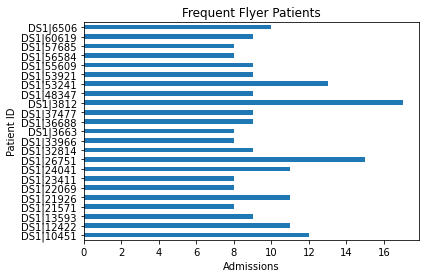

In [326]:
ax = freq_fliers.plot.barh(rot=0,legend=False)
plt.title("Frequent Flyer Patients")
plt.xlabel("Admissions")
plt.ylabel("Patient ID")